<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_14/TidyTuesday_Foundation_Makeup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
df_all_shades = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-30/allShades.csv')

df_all_shades.head()

,brand,product,url,description,imgSrc,imgAlt,name,specific,colorspace,hex,hue,sat,lightness
0,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,355N (medium skin with a neutral golden undert...,https://images.ulta.com/is/image/Ulta/2551437s...,355N (medium skin with a neutral golden undert...,NaN,355N,RGB,#A06F4A,25.813953,0.367521,0.458824
1,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,100N (very fair skin with a neutral undertone),https://images.ulta.com/is/image/Ulta/2551414s...,100N (very fair skin with a neutral undertone),NaN,100N,RGB,#F1E7DB,32.727273,0.440000,0.901961
2,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,110C (very fair skin with a cool undertone),https://images.ulta.com/is/image/Ulta/2551412s...,110C (very fair skin with a cool undertone),NaN,110C,RGB,#F0E7DB,34.285714,0.411765,0.900000
3,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,120W (very fair skin with a warm undertone),https://images.ulta.com/is/image/Ulta/2551419s...,120W (very fair skin with a warm undertone),NaN,120W,RGB,#EFD0AE,31.384615,0.670103,0.809804
4,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,130N (very fair skin with a neutral pink under...,https://images.ulta.com/is/image/Ulta/2551416s...,130N (very fair skin with a neutral pink under...,NaN,130N,RGB,#D5C1AA,32.093023,0.338583,0.750980


# Plotting

Font prep. Font collected from [here](https://fonts.google.com/specimen/Open+Sans?thickness=3).

In [6]:
# Fonts from my github, but OG is from Google free fonts. Link above.
!unzip '/content/Open_Sans.zip'

# Paths to .tff files from zip
bold_path = '/content/OpenSans-ExtraBold.ttf'
regular_path = '/content/OpenSans-Regular.ttf'

# Fonts
bold_opensans = fm.FontProperties(fname = bold_path,
                                  size= 30)

sub_title_opensans = fm.FontProperties(fname = regular_path,
                             size= 20)

sub_title_2_opensans = fm.FontProperties(fname = regular_path,
                             size= 15)

credits_opensans = fm.FontProperties(fname = regular_path,
                             size= 10)


Archive:  /content/Open_Sans.zip
  inflating: LICENSE.txt             
  inflating: OpenSans-Light.ttf      
  inflating: OpenSans-LightItalic.ttf  
  inflating: OpenSans-Regular.ttf    
  inflating: OpenSans-Italic.ttf     
  inflating: OpenSans-SemiBold.ttf   
  inflating: OpenSans-SemiBoldItalic.ttf  
  inflating: OpenSans-Bold.ttf       
  inflating: OpenSans-BoldItalic.ttf  
  inflating: OpenSans-ExtraBold.ttf  
  inflating: OpenSans-ExtraBoldItalic.ttf  


Plot

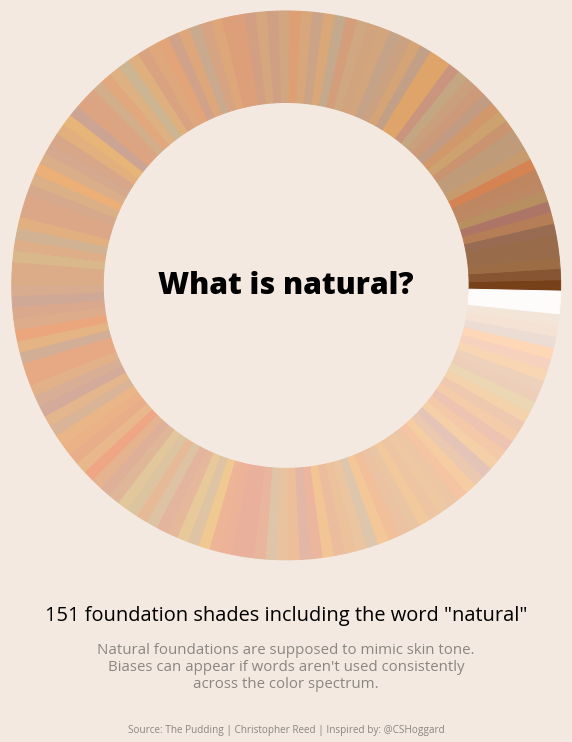

In [12]:
########################
## WRANGLE COMPONENTS ##
########################

# Collect shades containing 'natural, sorted by lightness
natural_shades = (df_all_shades[df_all_shades['description'].
 str.lower().
 str.contains('natural')].
 sort_values(by = 'lightness')
 ['hex'].
 to_list())

# Num shades 
num_natural_shades = len(natural_shades)

# Height of bars
heights = [0.5] * num_natural_shades

# Angle for each bar
theta = np.arange(0, 
                2*np.pi,
                2*np.pi/num_natural_shades)

# Width of bars
width = (2*np.pi)/num_natural_shades * 1.0

##############
## PLOT MAIN##
##############

# Create fig and ax in polar coords
fig, ax = plt.subplots(figsize = (10, 20),
                       subplot_kw = dict(polar = True))

# Add bars
bars = ax.bar(theta,
              heights,
              width = width,
              bottom = 1,
              color = natural_shades,
              edgecolor = natural_shades)

##########
## TEXT ##
##########

# Title in circle
ax.text(0, 0,
        'What is natural?',
        fontproperties = bold_opensans,
        ha = 'center',
        va = 'center')

# Sub title
ax.text(0.5, -0.1,
        '151 foundation shades including the word \"natural\"',
        fontproperties = sub_title_opensans,
        ha = 'center',
        transform = ax.transAxes)

# Sub sub title
ax.text(0.5, -0.22,
        'Natural foundations are supposed to mimic skin tone.\nBiases can appear if words aren\'t used consistently\nacross the color spectrum.',
        color = '#8b8682',
        ha = 'center',
        fontproperties = sub_title_2_opensans,
        transform = ax.transAxes)

# Credits
ax.text(0.5, -0.30,
        'Source: The Pudding | Christopher Reed | Inspired by: @CSHoggard',
        fontproperties = credits_opensans,
        color = '#8b8682',
        ha = 'center',
        transform = ax.transAxes)

#################
## EXTRA STEPS ##
#################

# Set facecolors
ax.set_facecolor('#f3e9e0')
fig.set_facecolor('#f3e9e0')

# Hide all gridlines and tick labels
ax.grid(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

#############
## SAVE (: ##
#############

plt.savefig('Make Up Shades Low Res', bbox_inches = 'tight', facecolor = '#f3e9e0')